# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

Using TensorFlow backend.


# Reading audit_risk and trial into pandas dataframes

In [3]:
auditrisk_df = pd.read_csv('audit_risk.csv')
trial_df = pd.read_csv('trial.csv')

In [4]:
#Checking the shape of the auditrisk_df
print(auditrisk_df.shape)

(776, 27)


In [5]:
#Checking the shape of the trial_df
print(trial_df.shape)

(776, 18)


In [6]:
auditrisk_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [7]:
trial_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

auditrisk_df has two columns with the same name - PROB and Prob. Checking how similar they are in their values:

In [8]:
auditrisk_df.query('PROB != Prob')

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
12,3.89,8,5.47,0.6,3.282,7.63,0.4,3.052,13.10,5.0,...,0.4,1,0.4,0.4,3.6,14.392,0.8,0.5,5.7568,1
16,3.89,37,8.54,0.6,5.124,31.63,0.6,18.978,40.17,5.0,...,0.4,1,0.4,0.4,4.2,50.670,0.8,0.5,20.2680,1
20,3.89,24,6.26,0.6,3.756,14.10,0.6,8.460,20.36,5.0,...,0.4,1,0.4,0.4,4.2,34.560,0.8,0.5,13.8240,1
22,3.89,3,5.31,0.6,3.186,22.79,0.6,13.674,28.10,5.0,...,0.4,1,0.4,0.4,4.2,141.774,0.8,0.5,56.7096,1
48,3.89,21,0.00,0.2,0.000,20.71,0.6,12.426,20.71,5.0,...,0.4,2,0.6,1.2,4.0,27.500,1.6,0.5,22.0000,1
50,3.89,22,1.97,0.4,0.788,2.10,0.2,0.420,4.07,5.0,...,1.2,0,0.2,0.0,3.0,10.782,1.2,0.5,6.4692,1
58,3.89,11,6.67,0.6,4.002,18.02,0.6,10.812,24.69,5.5,...,0.4,2,0.6,1.2,4.4,19.604,1.6,0.5,15.6832,1
64,3.89,12,4.76,0.6,2.856,13.03,0.6,7.818,17.79,5.0,...,0.4,1,0.4,0.4,3.8,12.590,0.8,0.5,5.0360,1
65,3.89,12,8.81,0.6,5.286,9.02,0.4,3.608,17.83,5.0,...,0.4,1,0.4,0.4,3.6,139.880,0.8,0.5,55.9520,1
71,3.89,8,10.00,0.6,6.000,74.26,0.6,44.556,84.26,5.5,...,0.4,3,0.6,1.8,4.8,61.652,2.2,0.5,67.8172,1


There are 63 rows where the values of PROB and Prob are different. So, renaming one of the columns is our way to go ahead here.

In [9]:
auditrisk_df.rename(columns = {'PROB':'PROB1'}, inplace = True)

In [10]:
auditrisk_df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


Score_A, Score_B, Score_B.1, Risk_E, Prob, Risk_F, Score and Detection_Risk are the columns with very low variance in the auditrisk_df. Checking the number of unique values in those rows:

In [11]:
print(auditrisk_df['Score_A'].nunique())
print(auditrisk_df['Score_B'].nunique())
print(auditrisk_df['Score_B.1'].nunique())
print(auditrisk_df['RiSk_E'].nunique())
print(auditrisk_df['Prob'].nunique())
print(auditrisk_df['Risk_F'].nunique())
print(auditrisk_df['Score'].nunique())
print(auditrisk_df['Detection_Risk'].nunique())

3
3
3
5
3
7
17
1


Detection_Risk has only one unique value which essentially means all its rows have equal values. Therefore, dropping it.

In [12]:
auditrisk_df = auditrisk_df.drop('Detection_Risk', axis = 1)

Columns in both audit_risk and trial:

In [13]:
audit_columns = set(auditrisk_df.columns)
trial_colums = set(trial_df.columns)

audit_columns.intersection(trial_colums)

{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'}

In [14]:
common_columns = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B', 'Risk', 'Score', 'Sector_score', 'TOTAL', 'numbers']

Columns in trial and not in audit_risk:

In [15]:
trial_colums.difference(audit_columns)

{'District',
 'History_score',
 'LOSS_SCORE',
 'Loss',
 'MONEY_Marks',
 'Marks',
 'SCORE_A',
 'SCORE_B'}

In [16]:
auditrisk_scoreA = auditrisk_df['Score_A']
trial_scoreA = trial_df['SCORE_A']
scoreA = pd.DataFrame(auditrisk_scoreA)
scoreA['trail_scoreA'] = trial_scoreA
scoreA.head(20)

,Score_A,trail_scoreA
0,0.6,6
1,0.2,2
2,0.2,2
3,0.2,2
4,0.2,2
5,0.2,2
6,0.4,4
7,0.6,6
8,0.6,6
9,0.6,6


In [17]:
auditrisk_scoreB = auditrisk_df['Score_B']
trial_scoreB = trial_df['SCORE_B']
scoreB = pd.DataFrame(auditrisk_scoreB)
scoreB['trail_scoreA'] = trial_scoreB
scoreB.head(20)

,Score_B,trail_scoreA
0,0.2,2
1,0.2,2
2,0.2,2
3,0.6,6
4,0.2,2
5,0.2,2
6,0.4,4
7,0.6,6
8,0.6,6
9,0.2,2


It is clear from the above analysis that Score_A*10 and Score_B*10 from audit_risk is SCORE_A and SCORE_B in trial. So, they can be modified and be considered as common columns.

In [18]:
auditrisk_df['Score_A'] = auditrisk_df['Score_A']*10
auditrisk_df['Score_B'] = auditrisk_df['Score_B']*10

In [19]:
common_columns = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B', 'Risk', 'Score', 'Sector_score', 'TOTAL', 'numbers', 'Score_A', 'Score_B']

In [20]:
auditrisk_Risk = auditrisk_df['Risk']
trial_Risk = trial_df['Risk']
Risk = pd.DataFrame(auditrisk_Risk)
Risk['RiskTrail'] = trial_Risk
Risk.head(20)

,Risk,RiskTrail
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,0,1


Risk is the column with different values in audit_risk and trial dataframes.

In [21]:
auditrisk_df.rename(columns = {'Score_A':'SCORE_A'}, inplace = True)
auditrisk_df.rename(columns = {'Score_B':'SCORE_B'}, inplace = True)

In [22]:
common_columns = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B', 'Score', 'Sector_score', 'TOTAL', 'numbers', 'SCORE_A', 'SCORE_B']

In [23]:
risk = auditrisk_df.merge(trial_df, on=common_columns)
risk = risk.drop_duplicates()
risk.shape

(763, 33)

In [24]:
risk.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'Risk_A', 'PARA_B',
       'SCORE_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB1', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk_x', 'Marks', 'MONEY_Marks', 'District', 'Loss',
       'LOSS_SCORE', 'History_score', 'Risk_y'],
      dtype='object')

In [25]:
#Checking for null values in the merged dataset
risk.isnull().any()

Sector_score     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
Risk_A           False
PARA_B           False
SCORE_B          False
Risk_B           False
TOTAL            False
numbers          False
Score_B.1        False
Risk_C           False
Money_Value       True
Score_MV         False
Risk_D           False
District_Loss    False
PROB1            False
RiSk_E           False
History          False
Prob             False
Risk_F           False
Score            False
Inherent_Risk    False
CONTROL_RISK     False
Audit_Risk       False
Risk_x           False
Marks            False
MONEY_Marks      False
District         False
Loss             False
LOSS_SCORE       False
History_score    False
Risk_y           False
dtype: bool

Money_Value is the only column that has a null value.

In [26]:
#Dropping the rows with string values in the LOCATION_ID column
risk = risk[risk['LOCATION_ID']!='LOHARU']
risk = risk[risk['LOCATION_ID']!='NUH']
risk = risk[risk['LOCATION_ID']!='SAFIDON']

In [27]:
#Converting the LOCATION_ID column with replaced string values to a float column
risk['LOCATION_ID'] = risk['LOCATION_ID'].astype(float)

In [28]:
#Imputing the missing value in the Money_Value column
risk['Money_Value'] = risk['Money_Value'].replace('', np.nan)
risk['Money_Value'] = risk['Money_Value'].replace(np.nan,risk.Money_Value.mean())

In [29]:
#Checking if the null values in Money_Value are replaced
risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 809
Data columns (total 33 columns):
Sector_score     760 non-null float64
LOCATION_ID      760 non-null float64
PARA_A           760 non-null float64
SCORE_A          760 non-null float64
Risk_A           760 non-null float64
PARA_B           760 non-null float64
SCORE_B          760 non-null float64
Risk_B           760 non-null float64
TOTAL            760 non-null float64
numbers          760 non-null float64
Score_B.1        760 non-null float64
Risk_C           760 non-null float64
Money_Value      760 non-null float64
Score_MV         760 non-null float64
Risk_D           760 non-null float64
District_Loss    760 non-null int64
PROB1            760 non-null float64
RiSk_E           760 non-null float64
History          760 non-null int64
Prob             760 non-null float64
Risk_F           760 non-null float64
Score            760 non-null float64
Inherent_Risk    760 non-null float64
CONTROL_RISK     760 non-

In [30]:
risk.describe()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,Risk_A,PARA_B,SCORE_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Audit_Risk,Risk_x,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_y
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.791303,14.913158,2.499382,3.544737,1.378992,11.026830,3.155263,6.467250,13.493844,5.069079,...,0.575263,7.311627,0.400000,2.242105,2.928947,2.510526,0.030263,2.063158,2.171053,0.638158
std,24.154233,9.935912,5.728092,1.744738,3.471049,50.584064,1.707798,30.373976,51.815320,0.267037,...,0.448001,39.060120,0.490221,0.811197,1.608673,1.233009,0.186161,0.378904,0.686558,0.480850
min,1.850000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,...,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.257500,2.000000,0.051500,0.000000,2.000000,0.000000,0.597500,5.000000,...,0.400000,0.318800,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.915000,2.000000,0.183000,0.455000,2.000000,0.091000,1.430000,5.000000,...,0.400000,0.619400,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,19.000000,2.525000,6.000000,1.515000,4.482500,4.000000,2.113500,8.072500,5.000000,...,0.400000,3.469800,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,44.000000,85.000000,6.000000,51.000000,1264.630000,6.000000,758.778000,1268.910000,9.000000,...,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


Scaling is an essential step before fitting the models as most estimators are developed with an assumption that the features involved vary on a comparable scale. We believe checking for outliers and knowing the distribution of data will help us decide on the type of scaling to be used.

In [31]:
#Checking for outliers in the merged dataframe for deciding on the type of scaling to be used
from numpy import mean
from numpy import std

for i in risk:
    data_mean, data_std = mean(risk[i]), std(risk[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in risk[i] if x < lower or x > upper]
    print('Identified outliers in ' + i + ': %d' % len(outliers))

Identified outliers in Sector_score: 0
Identified outliers in LOCATION_ID: 0
Identified outliers in PARA_A: 7
Identified outliers in SCORE_A: 0
Identified outliers in Risk_A: 7
Identified outliers in PARA_B: 1
Identified outliers in SCORE_B: 0
Identified outliers in Risk_B: 1
Identified outliers in TOTAL: 2
Identified outliers in numbers: 22
Identified outliers in Score_B.1: 22
Identified outliers in Risk_C: 22
Identified outliers in Money_Value: 6
Identified outliers in Score_MV: 0
Identified outliers in Risk_D: 6
Identified outliers in District_Loss: 0
Identified outliers in PROB1: 22
Identified outliers in RiSk_E: 6
Identified outliers in History: 15
Identified outliers in Prob: 15
Identified outliers in Risk_F: 15
Identified outliers in Score: 0
Identified outliers in Inherent_Risk: 7
Identified outliers in CONTROL_RISK: 15
Identified outliers in Audit_Risk: 6
Identified outliers in Risk_x: 0
Identified outliers in Marks: 22
Identified outliers in MONEY_Marks: 0
Identified outliers

In [32]:
risk_columns = list(risk.columns)

(0, 10)

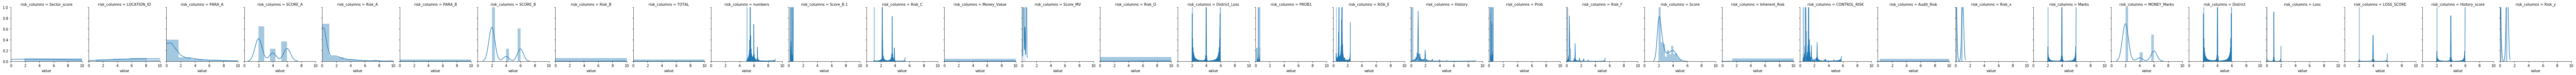

In [33]:
risk_distplots = pd.DataFrame(risk, columns = risk_columns)
risk_distplots_melt = risk_distplots.melt(var_name='risk_columns')
risk_distplots = sns.FacetGrid(risk_distplots_melt, col='risk_columns')
risk_distplots = (risk_distplots.map(sns.distplot, 'value'))
axes = risk_distplots.axes
axes[0,0].set_ylim(0,1)
axes[0,0].set_xlim(0,10)

Since it is evident from the above distribution plots that the distribution of data is not Gaussian, MinMax Scaler is a better fit for our data. After MinMax scaling, we have smaller standard deviations in our data and we therefore end up with suppressed effect of outliers.

# Dealing with the outliers

Visualizing and dealing with outliers in the PARA_A Column

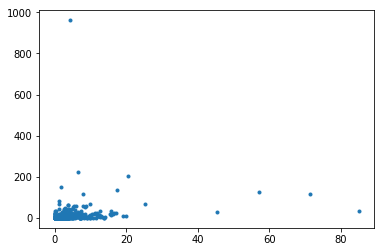

In [34]:
plt.plot(risk['PARA_A'],risk['Audit_Risk'],'.')

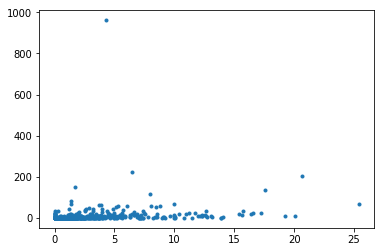

In [35]:
risk=risk[abs(risk['PARA_A'])<40]
plt.plot(risk['PARA_A'],risk['Audit_Risk'],'.')

Visualizing and dealing with outliers in PARA_B Column

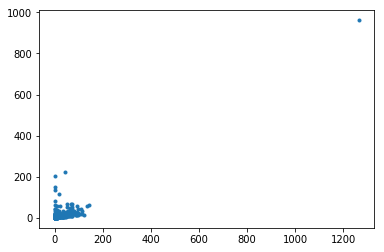

In [36]:
plt.plot(risk['PARA_B'],risk['Audit_Risk'],'.')

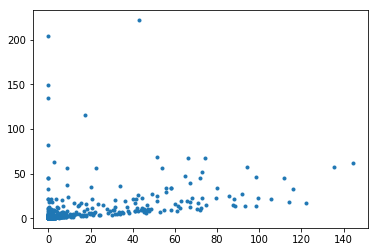

In [37]:
risk=risk[abs(risk['PARA_B'])<200]
plt.plot(risk['PARA_B'],risk['Audit_Risk'],'.')

Visualizing and dealing with outliers in the Money_Value column

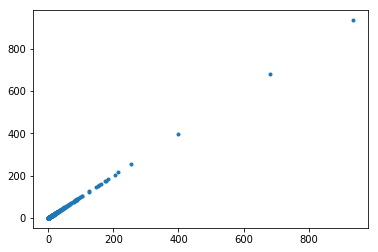

In [38]:
plt.plot(risk['Money_Value'],risk['Money_Value'],'.')

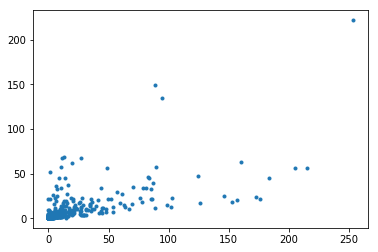

In [39]:
risk=risk[abs(risk['Money_Value'])<300]
plt.plot(risk['Money_Value'],risk['Audit_Risk'],'.')

In [40]:
#Checking the shape of the dataset after dealing with outliers and performing type conversion
risk.shape

(752, 33)

In [41]:
risk.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'Risk_A', 'PARA_B',
       'SCORE_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB1', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk_x', 'Marks', 'MONEY_Marks', 'District', 'Loss',
       'LOSS_SCORE', 'History_score', 'Risk_y'],
      dtype='object')

We can see that the merging resulted in two different columns, Risk_x and Risk_y, as we observed earlier that values in both Risk columns are different. We can therefore build the Risk column by OR operation.

In [42]:
risk['Risk'] = risk['Risk_x'] | risk['Risk_y']

Now, dropping the Risk_x and Risk_y:

In [43]:
risk = risk.drop(['Risk_x', 'Risk_y'], axis = 1)

In [44]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 809
Data columns (total 32 columns):
Sector_score     752 non-null float64
LOCATION_ID      752 non-null float64
PARA_A           752 non-null float64
SCORE_A          752 non-null float64
Risk_A           752 non-null float64
PARA_B           752 non-null float64
SCORE_B          752 non-null float64
Risk_B           752 non-null float64
TOTAL            752 non-null float64
numbers          752 non-null float64
Score_B.1        752 non-null float64
Risk_C           752 non-null float64
Money_Value      752 non-null float64
Score_MV         752 non-null float64
Risk_D           752 non-null float64
District_Loss    752 non-null int64
PROB1            752 non-null float64
RiSk_E           752 non-null float64
History          752 non-null int64
Prob             752 non-null float64
Risk_F           752 non-null float64
Score            752 non-null float64
Inherent_Risk    752 non-null float64
CONTROL_RISK     752 non-

In [45]:
risk.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'Risk_A', 'PARA_B',
       'SCORE_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB1', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE',
       'History_score', 'Risk'],
      dtype='object')

In [46]:
risk[['MONEY_Marks','Score_MV']].head(20)

,MONEY_Marks,Score_MV
0,2,0.2
1,2,0.2
2,2,0.2
3,6,0.6
4,2,0.2
5,2,0.2
6,6,0.6
7,4,0.4
8,4,0.4
9,2,0.2


MONEY_Marks is obtained by multiplying Score_MV by 10. Therfore MONEY_Marks can be dropped.

In [47]:
risk = risk.drop('MONEY_Marks', axis = 1)

In [48]:
risk.query('District_Loss != District')

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,Risk_A,PARA_B,SCORE_B,Risk_B,TOTAL,numbers,...,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Marks,District,Loss,LOSS_SCORE,History_score,Risk


It can be seen that District_Loss and District have the same values. Therefore, District can be dropped.

In [49]:
risk = risk.drop('District', axis = 1)

In [50]:
risk = risk.drop('LOCATION_ID', axis = 1)

In [51]:
risk.shape

(752, 29)

In [52]:
risk.columns

Index(['Sector_score', 'PARA_A', 'SCORE_A', 'Risk_A', 'PARA_B', 'SCORE_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB1', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Marks', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk'],
      dtype='object')

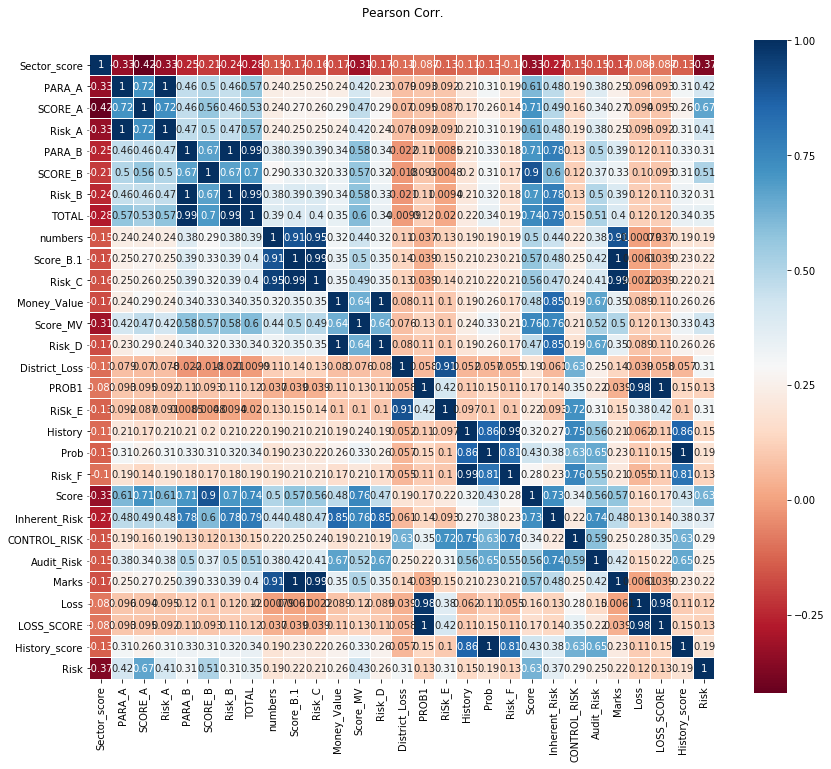

In [53]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(risk.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [54]:
x = risk.corr()
pd.DataFrame(x['Risk']).sort_values(by='Risk',ascending = False).style.background_gradient(cmap = 'Greens')

,Risk
Risk,1
SCORE_A,0.665174
Score,0.625181
SCORE_B,0.508839
Score_MV,0.432593
PARA_A,0.422768
Risk_A,0.414181
Inherent_Risk,0.367002
TOTAL,0.349396
PARA_B,0.313033


# Scaling and splitting the data

In [55]:
y = risk['Audit_Risk']
X = risk.drop(['Audit_Risk'], axis = 1)

In [56]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [57]:
Train_Test_Dict = {}

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Regression Tasks

### Bagging with DecisionTreeRegressor and KNeighborsRegressor

In [59]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#DecisionTree regressor with Bagging
dt = DecisionTreeRegressor()
bag_reg = BaggingRegressor(dt, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)
dt_bag_reg = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(dt_bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(dt_bag_reg.score(X_test, y_test)))

Train score: 0.75
Test score: 0.70


In [60]:
#KNeighborsRegressor with Bagging
kn = KNeighborsRegressor()
bag_reg = BaggingRegressor(kn, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

kn_bag = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.48
Test score: 0.49


### Pasting with SVR model and KNRegressor

In [61]:
#SVR - linear with Pasting
svr = SVR(kernel='linear', C=100, gamma='auto')
bag_reg = BaggingRegressor(svr, n_estimators=300, max_samples=100, bootstrap=False, random_state=0)
svr_bag = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.73
Test score: 0.65


In [62]:
#SVR - rbf with Pasting
svr = SVR(kernel='rbf', C=100, gamma='auto')
bag_reg = BaggingRegressor(svr, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
svr_bag = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.62
Test score: 0.61


In [63]:
#KNeighborsRegressor with Pasting
kn = KNeighborsRegressor(10)
bag_reg = BaggingRegressor(kn, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

kn_bag = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.41
Test score: 0.42


### AdaBoost Regression -  Decision Tree, KNN Regression

In [64]:
#AdaBoost with DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

ada_rg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=5), n_estimators=200,
    learning_rate=0.5, random_state=0)
ada_rg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [65]:
print('Train score: {:.2f}'.format(ada_rg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_rg.score(X_test, y_test)))

Train score: 0.99
Test score: 0.20


In [66]:
#AdaBoost with KNeighbors Regressor

from sklearn.ensemble import AdaBoostRegressor

ada_rg = AdaBoostRegressor(
    KNeighborsRegressor(6), n_estimators=500,
    learning_rate=1, random_state=0)
ada_rg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=6, p=2,
          weights='uniform'),
         learning_rate=1, loss='linear', n_estimators=500, random_state=0)

In [67]:
print('Train score: {:.2f}'.format(ada_rg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_rg.score(X_test, y_test)))

Train score: 0.99
Test score: 0.87


### Gradient Boost Regression

In [68]:
#GradientBoost Regressor
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

# PCA on data before running Regression Models

In [69]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [70]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [71]:
pca.n_components_

9

In [72]:
pca.explained_variance_

array([0.71781324, 0.18238018, 0.13216902, 0.12030722, 0.07127502,
       0.0656671 , 0.05683711, 0.0507846 , 0.02838691])

In [73]:
np.sum(pca.explained_variance_ratio_) 

0.9626489419546147

In [75]:
pca = PCA(n_components = 9)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Regression Tasks on Reduced Data Set

### Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train_reduced, y_train)

print('Train score: %.4f'%lreg.score(X_train_reduced, y_train))
print('Test score: %.4f'%lreg.score(X_test_reduced, y_test))
Train_Test_Dict.update({"LinearRegression" : [lreg.score(X_train_reduced, y_train), lreg.score(X_test_reduced, y_test)]})

Train score: 0.6796
Test score: 0.6793


Text(0.5, 0, 'RM')

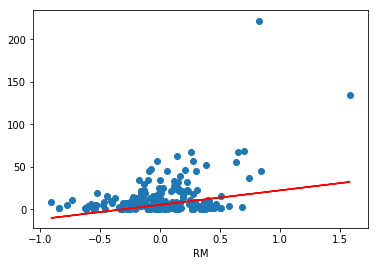

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train_reduced[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

Text(0.5, 0, 'RM')

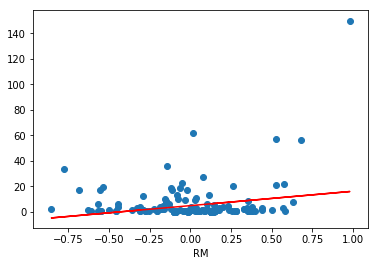

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

X_test_rm = X_test_reduced[:,5].reshape(-1,1)
lreg.fit(X_test_rm, y_test)
y_predict = lreg.predict(X_test_rm)

plt.plot(X_test_rm, y_predict, c = 'r')
plt.scatter(X_test_rm,y_test)
plt.xlabel('RM')

### Ridge Regression 

In [79]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    train_score_list.append(ridge.score(X_train_reduced,y_train))
    test_score_list.append(ridge.score(X_test_reduced, y_test))

print(train_score_list)
print(test_score_list)

ridge = Ridge(1)
ridge.fit(X_train_reduced,y_train)
ridge.score(X_train_reduced,y_train)
ridge.score(X_test_reduced, y_test)
Train_Test_Dict.update({"Ridge" : [ridge.score(X_train_reduced, y_train), ridge.score(X_test_reduced, y_test)]})

[0.6796011516606788, 0.6795987392925967, 0.6793724463561481, 0.6657212298436821, 0.49714418135648475]
[0.6792833262439544, 0.6793668335767, 0.6799118442551098, 0.6692358580764372, 0.49214068828128693]


Text(0.5, 0, '$\\alpha$')

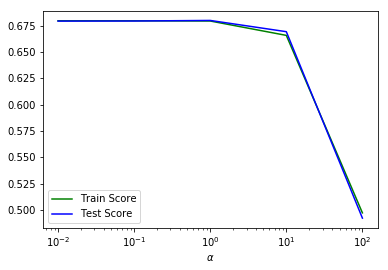

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

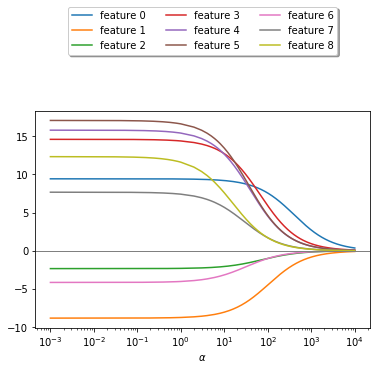

In [81]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [82]:
#Ridge with naive Grid search

from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    score = ridge.score(X_test_reduced, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'x': alpha}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Best score: 0.68
Best parameters: {'x': 1}


In [83]:
from sklearn.model_selection import GridSearchCV
params={'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, params,cv=5,verbose = 1,return_train_score=True) 
grid_search.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [84]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.68


In [85]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001389,0.000496,0.000446,0.000450,0.01,{'alpha': 0.01},0.557048,0.614085,0.768103,0.532227,...,0.628678,0.084896,4,0.684329,0.683479,0.650919,0.776432,0.674098,0.693851,0.043014
1,0.001101,0.000486,0.000599,0.000489,0.1,{'alpha': 0.1},0.559246,0.615711,0.767863,0.531524,...,0.629728,0.084802,3,0.684326,0.683475,0.650915,0.776428,0.674094,0.693848,0.043015
2,0.000632,0.000450,0.000621,0.000396,1,{'alpha': 1},0.580039,0.630646,0.765145,0.524694,...,0.639324,0.084707,2,0.683995,0.683131,0.650547,0.776117,0.673690,0.693496,0.043037
3,0.000831,0.000474,0.000453,0.000562,10,{'alpha': 10},0.706408,0.704897,0.724427,0.470751,...,0.682152,0.112019,1,0.664850,0.664315,0.631224,0.758405,0.652281,0.674215,0.043825
4,0.001200,0.000398,0.000203,0.000405,100,{'alpha': 100},0.708931,0.649131,0.471125,0.283900,...,0.564059,0.165086,5,0.465153,0.470688,0.451567,0.557788,0.452707,0.479581,0.039776


### Lasso Regression 

In [86]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    train_score_list.append(lasso.score(X_train_reduced,y_train))
    test_score_list.append(lasso.score(X_test_reduced, y_test))
    
print(train_score_list)
print(test_score_list)
lasso = Lasso(0.01)
lasso.fit(X_train_reduced,y_train)
lasso.score(X_train_reduced,y_train)
lasso.score(X_test_reduced, y_test)
Train_Test_Dict.update({"Lasso" : [lasso.score(X_train_reduced, y_train), lasso.score(X_test_reduced, y_test)]})

[0.6795443130756341, 0.6739148648148241, 0.4357317662471638, 0.0, 0.0]
[0.6792233530123422, 0.6704198955250411, 0.42011717634358947, -0.00039469706565697926, -0.00039469706565697926]


Text(0.5, 0, '$\\alpha$')

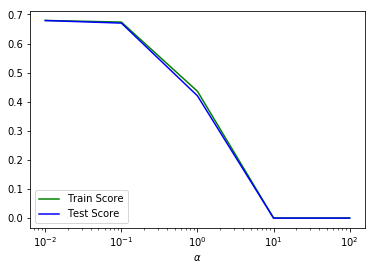

In [87]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

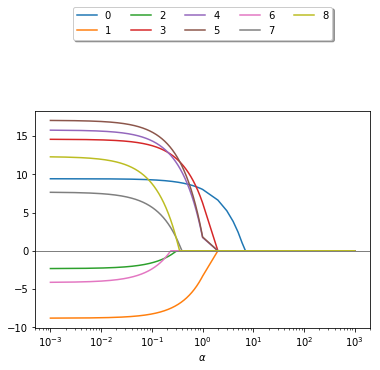

In [88]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = i)

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=5, fancybox=True, shadow=True)
plt.show()

In [89]:
#Lasso with Grid search

from  sklearn.linear_model import Lasso

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    score = lasso.score(X_test_reduced, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'x': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.68
Best parameters: {'x': 0.01}


In [90]:
from sklearn.model_selection import GridSearchCV
params={'alpha': [0.01, 0.1, 1, 10, 100]}
lso_reg = Lasso()
grid_search = GridSearchCV(lso_reg, params,cv=5,verbose = 1,return_train_score=True) 
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
grid_search.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [91]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.66


In [92]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001860,0.000554,0.000417,0.000398,0.01,{'alpha': 0.01},0.564809,0.619598,0.767073,0.529076,...,0.632009,0.084671,2,0.684280,0.683433,0.650860,0.776352,0.674044,0.693794,0.043005
1,0.001235,0.000387,0.000400,0.000490,0.1,{'alpha': 0.1},0.625142,0.664036,0.752614,0.497195,...,0.655058,0.091812,1,0.679399,0.678874,0.645045,0.768415,0.668678,0.688082,0.042053
2,0.000597,0.000487,0.000410,0.000502,1,{'alpha': 1},0.684991,0.672351,0.408239,0.230179,...,0.530298,0.181793,3,0.466435,0.469351,0.400137,0.459371,0.442560,0.447571,0.025474
3,0.000925,0.000634,0.000199,0.000399,10,{'alpha': 10},-0.004947,-0.010637,-0.000114,-0.008830,...,-0.005637,0.003749,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000581,0.000474,0.000539,0.000453,100,{'alpha': 100},-0.004947,-0.010637,-0.000114,-0.008830,...,-0.005637,0.003749,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Polynomial Regression 

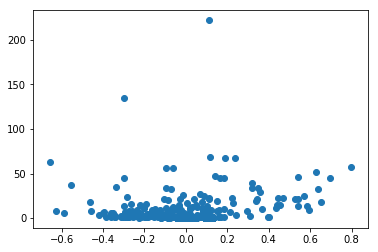

In [94]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
X_train_1 = X_train_reduced[:,8].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [95]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)
Train_Test_Dict.update({"Polynomial Regression" : [lreg.score(X_train_poly, y_train), lreg.score(X_test_poly, y_test)]})

[0.6796011761893799, 0.9591503340783291]
[0.6792736973452677, 0.7661400379027656]


## KNeighborsRegressor

Text(0, 0.5, 'R2-Score')

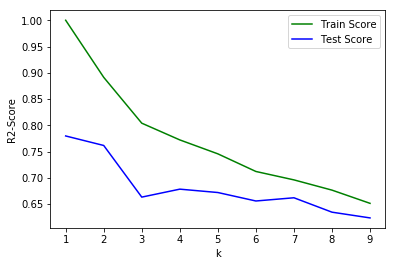

In [104]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_reduced, y_train)
    train_score_array.append(knn_reg.score(X_train_reduced, y_train))
    test_score_array.append(knn_reg.score(X_test_reduced, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('R2-Score')

In [105]:
print(train_score_array)
print(test_score_array)

[1.0, 0.8913691482638982, 0.8041102057384665, 0.7722636552391056, 0.7457568230073741, 0.7121965798134395, 0.6961923983770006, 0.6767021656978376, 0.6515547935090317]
[0.7797957357614796, 0.7616825403135544, 0.6634118345331459, 0.6785556226715287, 0.6721484876947748, 0.6560268425672018, 0.662149495822073, 0.6347475962737026, 0.6238180266240967]


In [106]:
knn_reg = KNeighborsRegressor(6)
knn_reg.fit(X_train_reduced, y_train)   
Train_Test_Dict.update({"KNeighbors Regressor" : [knn_reg.score(X_train_reduced, y_train), knn_reg.score(X_test_reduced, y_test)]})

In [107]:
param_grid_knn = {
            'leaf_size' : range(1,50),
            'n_neighbors' : range(1,50),
            'p': [1,2],
            'weights': ['distance','uniform'],
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CV_knn.fit(X_train_reduced, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 9604 candidates, totalling 28812 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2196 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 4696 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 8196 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 12696 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 18196 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 24696 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 28812 out of 28812 | elapsed:  1.3min finished


{'leaf_size': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [108]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(CV_knn.cv_results_)
# show the first 5 rows
display(results.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001995,6.836514e-07,0.002253,0.000185,1,1,1,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.518608,0.528544,0.585251,0.544135,0.029356,5979,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001984,1.511698e-05,0.002096,0.000567,1,1,1,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.518608,0.528544,0.585251,0.544135,0.029356,5979,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001662,4.706398e-04,0.002723,0.000519,1,1,2,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.515997,0.541220,0.614489,0.557235,0.041773,5097,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.001383,2.770399e-04,0.002643,0.000497,1,1,2,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.515997,0.541220,0.614489,0.557235,0.041773,5097,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.001281,4.241538e-04,0.002044,0.000068,1,2,1,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.628072,0.532444,0.584612,0.581709,0.039094,3774,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.001304,5.152838e-04,0.001332,0.000471,1,2,1,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.634800,0.531656,0.530195,0.565550,0.048971,4509,0.891003,0.883062,0.873936,0.882667,0.006973
6,0.002005,1.322358e-05,0.003394,0.000437,1,2,2,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'we...",0.632845,0.537931,0.630339,0.600371,0.044164,2745,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.002754,5.423501e-04,0.009546,0.006689,1,2,2,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'we...",0.639984,0.537748,0.606598,0.594777,0.042566,2990,0.902766,0.906354,0.867607,0.892242,0.017481
8,0.001983,2.800401e-05,0.005040,0.002906,1,3,1,distance,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'we...",0.649059,0.458819,0.725394,0.611090,0.112092,2010,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.002660,4.696851e-04,0.009308,0.006829,1,3,1,uniform,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'we...",0.641153,0.446671,0.722893,0.603572,0.115856,2549,0.780388,0.863323,0.782926,0.808879,0.038511


## Linear SVR 

In [109]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
y_lin = svr_lin.fit(X_train_reduced, y_train).predict(X_test_reduced)


print("Coefficient shape: ", svr_lin.coef_.shape)
print("Intercept shape: ", svr_lin.intercept_.shape)

Train_Test_Dict.update({"SVR-Linear" : [svr_lin.score(X_train_reduced, y_train), svr_lin.score(X_test_reduced, y_test)]})

Coefficient shape:  (1, 9)
Intercept shape:  (1,)


## SVR - rbf 

In [111]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C= 100, gamma = 1)
svr_rbf.fit(X_train_reduced, y_train).predict(X_test_reduced)
print(svr_rbf.score(X_train_reduced, y_train))
print(svr_rbf.score(X_test_reduced,y_test))

Train_Test_Dict.update({"SVR-rbf" : [svr_rbf.score(X_train_reduced, y_train), svr_rbf.score(X_test_reduced, y_test)]})

0.9367159449815707
0.7669897857493193


## SVR - poly 

In [112]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly',degree=2, C = 100)
svr_poly.fit(X_train_reduced, y_train).predict(X_test_reduced)

print(svr_poly.score(X_train_reduced,y_train))
print(svr_poly.score(X_test_reduced,y_test))

Train_Test_Dict.update({"SVR-poly" : [svr_poly.score(X_train_reduced, y_train), svr_poly.score(X_test_reduced, y_test)]})

0.7997640930375283
0.875698304804147


C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Tabulation without PCA -  From Project 1

In [113]:
dreg_without_pca  = {'Linear Regression': [0.8598691632101171, 0.2846376431416151],
 'Ridge': [0.8285751031197872, 0.6386439066956926],
 'Lasso': [0.8075453701085701, 0.673966536233912],
 'Polynomial Regression': [0.9980859422503378, 0.8727062621667542],
 'KNeighbors Regressor': [0.6648023805265182, 0.6238087819114488],
 'SVR-linear': [0.6028733251837359, 0.655277662249728],
 'SVR-rbf': [0.6972463375276126, 0.9442542289854869],
 'SVR-poly': [0.5164093445062443, 0.6421312019857618]}

In [114]:
df_reg_without_pca = pd.DataFrame(dreg_without_pca)
df_reg_without_pca.rename(index={0: 'Train Score', 1: 'Train Score'})

,Linear Regression,Ridge,Lasso,Polynomial Regression,KNeighbors Regressor,SVR-linear,SVR-rbf,SVR-poly
Train Score,0.859869,0.828575,0.807545,0.998086,0.664802,0.602873,0.697246,0.516409
Train Score,0.284638,0.638644,0.673967,0.872706,0.623809,0.655278,0.944254,0.642131


## Tabulation with PCA

In [115]:
dreg_with_pca = {'LinearRegression': [0.6834172011182593, 0.6853593116975536],
 'Ridge': [0.6831903566849151, 0.6860440129013101],
 'Lasso': [0.6833515091930886, 0.6852939621565358],
 'Polynomial Regression': [0.8804139009765616, 0.6823468382721805],
 'KNeighbors Regressor': [0.7061175557144348, 0.6355396261680402],
 'SVR-Linear': [0.5249229076673491, 0.5474896073441378],
 'SVR-rbf': [0.9345717292042258, 0.7669788227085992],
 'SVR-poly': [0.7952166625128766, 0.8629188968340424]}

In [116]:
df_reg_with_pca = pd.DataFrame(dreg_with_pca)
df_reg_with_pca.rename(index={0: 'Train Score', 1: 'Train Score'})

,LinearRegression,Ridge,Lasso,Polynomial Regression,KNeighbors Regressor,SVR-Linear,SVR-rbf,SVR-poly
Train Score,0.683417,0.683190,0.683352,0.880414,0.706118,0.524923,0.934572,0.795217
Train Score,0.685359,0.686044,0.685294,0.682347,0.635540,0.547490,0.766979,0.862919


Using PCA on the data before running our Regression models resulted in a significant improvement of many of models, especially with Linear Regression. We can thus conclude that with dimensionality reduction, the models are able to learn better from the data and perform well on un-seen data as well. 

# Deep Learning Models - Regression

In [117]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [118]:
from keras import backend as K
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Perceptron - Regression 

In [120]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
#make model
modelRP = Sequential()
#input layer
modelRP.add(Dense(10, input_dim = 28 , activation = 'sigmoid'))
#output layer
modelRP.add(Dense(1))

#compile the model 
modelRP.compile(loss ='mse', optimizer = 'sgd' , metrics = [coeff_determination] )

#train the model
modelRP.fit(X_train, y_train, epochs = 400, batch_size = 128)

#evaluation
modelRP.evaluate(X_train, y_train)

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
564/564 [==============================] - 0s 484us/step - loss: 242.1987 - coeff_determination: -0.1240
Epoch 2/400
564/564 [==============================] - 0s 10us/step - loss: 224.7835 - coeff_determination: -0.0404
Epoch 3/400
564/564 [==============================] - 0s 12us/step - loss: 214.0793 - coeff_determination: 0.0308
Epoch 4/400
564/564 [==============================] - 0s 12us/step - loss: 209.5151 - coeff_determination: 0.0604
Epoch 5/400
564/564 [==============================] - 0s 11us/step - loss: 206.3808 - coeff_determination: 0.0678
Epoch 6/400
564/564 [==============================] - 0s 12us/step - loss: 203.7483 - coeff_determination: 0.0837
Epoch 7/400
564/564 [==============================] - 0s 11us/step - loss: 201.6580 - coeff_determination: 0.1145
Epoch 8/400
564/564 [==============================] - 0s 12us/step - loss: 198.8824 - coeff_determination: 0.1082
Epoch 9/400
564/564 [========

564/564 [==============================] - 0s 16us/step - loss: 48.0279 - coeff_determination: 0.8964
Epoch 140/400
564/564 [==============================] - 0s 14us/step - loss: 47.7787 - coeff_determination: 0.8612
Epoch 141/400
564/564 [==============================] - 0s 11us/step - loss: 47.5617 - coeff_determination: 0.8631
Epoch 142/400
564/564 [==============================] - 0s 11us/step - loss: 47.3519 - coeff_determination: 0.8717
Epoch 143/400
564/564 [==============================] - 0s 11us/step - loss: 47.2123 - coeff_determination: 0.9066
Epoch 144/400
564/564 [==============================] - 0s 12us/step - loss: 46.8691 - coeff_determination: 0.8994
Epoch 145/400
564/564 [==============================] - 0s 12us/step - loss: 46.7017 - coeff_determination: 0.8714
Epoch 146/400
564/564 [==============================] - 0s 12us/step - loss: 46.4221 - coeff_determination: 0.8755
Epoch 147/400
564/564 [==============================] - 0s 16us/step - loss: 46.2319 

564/564 [==============================] - 0s 16us/step - loss: 26.1475 - coeff_determination: 0.9427
Epoch 280/400
564/564 [==============================] - 0s 19us/step - loss: 26.1319 - coeff_determination: 0.9410
Epoch 281/400
564/564 [==============================] - 0s 14us/step - loss: 26.0256 - coeff_determination: 0.9302
Epoch 282/400
564/564 [==============================] - 0s 12us/step - loss: 25.9188 - coeff_determination: 0.9351
Epoch 283/400
564/564 [==============================] - 0s 12us/step - loss: 26.1427 - coeff_determination: 0.9315
Epoch 284/400
564/564 [==============================] - 0s 11us/step - loss: 25.7718 - coeff_determination: 0.9338
Epoch 285/400
564/564 [==============================] - 0s 11us/step - loss: 25.5936 - coeff_determination: 0.9307
Epoch 286/400
564/564 [==============================] - 0s 12us/step - loss: 25.6657 - coeff_determination: 0.9361
Epoch 287/400
564/564 [==============================] - 0s 14us/step - loss: 25.4034 

[16.72964054472903, 0.9718075398857712]

In [121]:
modelRP.evaluate(X_test, y_test)

188/188 [==============================] - 0s 21us/step


[13.941282371257214, 0.8726208209991455]

## MLP - Regression 

In [127]:
#make model
modelRM = Sequential()
#input layer
modelRM.add(Dense(10, input_dim = 28 , activation = 'sigmoid'))
#hidden layers
modelRM.add(Dense(5, activation = 'relu'))
#output layer
modelRM.add(Dense(1))

#compile the model 
modelRM.compile(loss ='mse', optimizer = 'sgd' , metrics = [coeff_determination] )

#train the model
modelRM.fit(X_train, y_train, epochs = 400, batch_size = 150)

#step 4: evaluation
modelRM.evaluate(X_train, y_train)

Epoch 1/400
564/564 [==============================] - 0s 497us/step - loss: 238.6783 - coeff_determination: -0.1315
Epoch 2/400
564/564 [==============================] - 0s 20us/step - loss: 221.8056 - coeff_determination: -0.0111
Epoch 3/400
564/564 [==============================] - 0s 16us/step - loss: 212.4229 - coeff_determination: 0.0336
Epoch 4/400
564/564 [==============================] - 0s 15us/step - loss: 209.5202 - coeff_determination: 0.0555
Epoch 5/400
564/564 [==============================] - 0s 14us/step - loss: 205.0314 - coeff_determination: 0.0665
Epoch 6/400
564/564 [==============================] - 0s 14us/step - loss: 202.6087 - coeff_determination: 0.0581
Epoch 7/400
564/564 [==============================] - 0s 14us/step - loss: 195.5711 - coeff_determination: 0.1425
Epoch 8/400
564/564 [==============================] - 0s 14us/step - loss: 186.6752 - coeff_determination: 0.1838
Epoch 9/400
564/564 [==============================] - 0s 12us/step - loss: 1

564/564 [==============================] - 0s 12us/step - loss: 3.2808 - coeff_determination: 0.9802
Epoch 143/400
564/564 [==============================] - 0s 11us/step - loss: 5.1224 - coeff_determination: 0.9681
Epoch 144/400
564/564 [==============================] - 0s 10us/step - loss: 4.8106 - coeff_determination: 0.9717
Epoch 145/400
564/564 [==============================] - 0s 11us/step - loss: 6.6359 - coeff_determination: 0.9514
Epoch 146/400
564/564 [==============================] - 0s 11us/step - loss: 24.3439 - coeff_determination: 0.8491
Epoch 147/400
564/564 [==============================] - 0s 12us/step - loss: 3.2852 - coeff_determination: 0.9764
Epoch 148/400
564/564 [==============================] - 0s 14us/step - loss: 2.4779 - coeff_determination: 0.9838
Epoch 149/400
564/564 [==============================] - 0s 16us/step - loss: 3.0437 - coeff_determination: 0.9733
Epoch 150/400
564/564 [==============================] - 0s 14us/step - loss: 4.8706 - coeff_

564/564 [==============================] - 0s 12us/step - loss: 1.3491 - coeff_determination: 0.9910
Epoch 285/400
564/564 [==============================] - 0s 13us/step - loss: 3.0990 - coeff_determination: 0.9786
Epoch 286/400
564/564 [==============================] - 0s 13us/step - loss: 1.2210 - coeff_determination: 0.9920
Epoch 287/400
564/564 [==============================] - 0s 11us/step - loss: 1.5672 - coeff_determination: 0.9898
Epoch 288/400
564/564 [==============================] - 0s 12us/step - loss: 2.4239 - coeff_determination: 0.9861
Epoch 289/400
564/564 [==============================] - 0s 18us/step - loss: 1.8487 - coeff_determination: 0.9899
Epoch 290/400
564/564 [==============================] - 0s 18us/step - loss: 1.2142 - coeff_determination: 0.9851
Epoch 291/400
564/564 [==============================] - 0s 14us/step - loss: 1.0792 - coeff_determination: 0.9914
Epoch 292/400
564/564 [==============================] - 0s 12us/step - loss: 1.0531 - coeff_d

Epoch 354/400
564/564 [==============================] - 0s 11us/step - loss: 0.8145 - coeff_determination: 0.9954
Epoch 355/400
564/564 [==============================] - 0s 12us/step - loss: 0.7708 - coeff_determination: 0.9957
Epoch 356/400
564/564 [==============================] - 0s 16us/step - loss: 0.9919 - coeff_determination: 0.9936
Epoch 357/400
564/564 [==============================] - 0s 14us/step - loss: 1.5368 - coeff_determination: 0.9918
Epoch 358/400
564/564 [==============================] - 0s 12us/step - loss: 1.3533 - coeff_determination: 0.9862
Epoch 359/400
564/564 [==============================] - 0s 12us/step - loss: 0.8925 - coeff_determination: 0.9924
Epoch 360/400
564/564 [==============================] - 0s 11us/step - loss: 0.9898 - coeff_determination: 0.9934
Epoch 361/400
564/564 [==============================] - 0s 12us/step - loss: 1.3488 - coeff_determination: 0.9883
Epoch 362/400
564/564 [==============================] - 0s 11us/step - loss: 0.

[1.2054089992604358, 0.9886299206855449]

In [128]:
modelRM.evaluate(X_test, y_test)

188/188 [==============================] - 0s 27us/step


[5.468964512043811, 0.9428615836386985]

# Classification Tasks

## Splitting and Scaling the data

In [129]:
y = risk['Risk']
X = risk.drop(['Risk'], axis = 1)

In [130]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Voting classifier - Soft Voting with KNN, Logistic regression, SVM

In [132]:
#Softvoting with KNN, Logistic regression, SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train, y_train)


voting_clf = VotingClassifier(estimators=[('svc', svm_clf), ('lr', log_clf), ('knn', knn_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (svm_clf, knn_clf, log_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 1.0
KNeighborsClassifier 1.0
LogisticRegression 0.9893617021276596
VotingClassifier 1.0


C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this 

## Voting classifier - Hard voting with Ridge, KNN, Logistic regression, SVM 

In [133]:
#Hard voting with Ridge, KNN, Logistic regression, SVM

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)
rg_clf = RidgeClassifier()
rg_clf.fit(X_train, y_train)
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train, y_train)


voting_clf = VotingClassifier(estimators=[('rdg', rg_clf), ('svc', svm_clf), ('lr', log_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (rg_clf, svm_clf, knn_clf, log_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


RidgeClassifier 0.9095744680851063
SVC 1.0
KNeighborsClassifier 1.0
LogisticRegression 0.9893617021276596
VotingClassifier 0.9893617021276596


C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this 

## Bagging - DecisionTreeClassifier - (Out of Bag), RandomForest Classifier and Ridge Classifier 

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

In [135]:
#Out of bag- Decision Tree
bag_clf = BaggingClassifier(
DecisionTreeClassifier(random_state=42), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,
oob_score = True)

dt_bag = bag_clf.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.98


In [136]:
#Bagging - RandomForest
rf = RandomForestClassifier()
bag_clf = BaggingClassifier(rf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

import warnings
warnings.filterwarnings("ignore")

rf_bag = bag_clf.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.99


In [137]:
#Bagging - Ridge
rg = RidgeClassifier()
bag_clf = BaggingClassifier(rg, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)
rg_bag = bag_clf.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.96
Test score: 0.95


## Pasting with KNeighborsClassfier and SVC

In [138]:
#KNeighborsClassifier with Pasting
kn = KNeighborsClassifier()
bag_reg = BaggingClassifier(kn, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

kn_bag = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.93
Test score: 0.93


In [139]:
#SVC - rbf with Pasting
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=100, gamma='auto')
bag_reg = BaggingClassifier(svc, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

svc_bag = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.99
Test score: 0.98


##  AdaBoost for Decision Tree Classifier, Logistic Regression 

In [140]:
from sklearn.ensemble import AdaBoostClassifier

#AdaBoost with DecisionTree Classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=200, random_state=0)

In [141]:
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.99


In [142]:
#AdaBoost with Logistic Regression
ada_clf = AdaBoostClassifier(
    LogisticRegression(), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1, n_estimators=200, random_state=0)

In [143]:
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.99


## Gradient Boosting 

In [144]:
#GradientBoost Classfier
from  sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.995


# PCA on data before running Classification Models

In [145]:
y = risk['Risk']
X = risk.drop(['Risk'], axis = 1)

In [146]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

In [148]:
from sklearn.decomposition import PCA

pca1 = PCA()
pca1.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [149]:
pca1 = PCA(n_components=0.95)
X_reduced = pca1.fit_transform(X_train)

In [150]:
pca1.n_components_

8

In [151]:
pca1.explained_variance_

array([0.60189751, 0.16084466, 0.12087345, 0.09466611, 0.06708307,
       0.06098528, 0.05646153, 0.03195871])

In [152]:
np.sum(pca.explained_variance_ratio_)

0.9626489419546147

In [153]:
pca = PCA(n_components = 8)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

## Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, y_test))

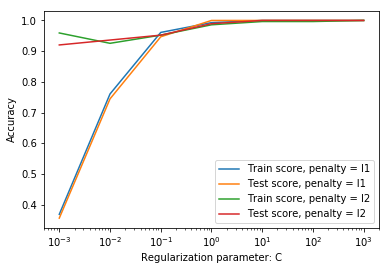

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

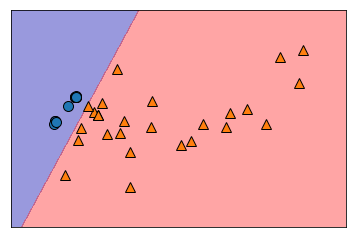

In [156]:
%matplotlib inline
import mglearn
X_b = X_train_reduced[10:50, [0,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

In [157]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

#X = merged[['Sector_score', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'District_Loss','PROB','History','Score']]
#y = merged ['Risk']

#X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X, y, random_state=0)

log = LogisticRegression().fit(X_train_reduced, y_train)

log.pred = log.predict(X_test_reduced)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, log.pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, log.pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, log.pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, log.pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, log.pred)))

Accuracy: 0.989
Confusion matrix:
[[ 67   0]
 [  2 119]]
Recall score:0.983
Precision score: 1.000
ROC AUC score: 0.992


## KNeighbors Classifier 

In [158]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_reduced, y_train)
    train_score_array.append(knn.score(X_train_reduced, y_train))
    test_score_array.append(knn.score(X_test_reduced, y_test))

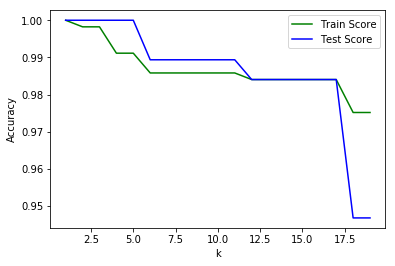

In [159]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [160]:
knn = KNeighborsClassifier(6)
knn.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))

Train score: 0.9858
Test score: 0.9894


In [161]:
knn_pred = knn.predict(X_test_reduced)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, knn_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, knn_pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, knn_pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, knn_pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, knn_pred)))

Accuracy: 0.989
Confusion matrix:
[[ 67   0]
 [  2 119]]
Recall score:0.983
Precision score: 1.000
ROC AUC score: 0.992


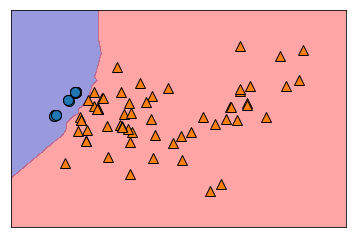

In [162]:
import mglearn
X_b = X_train_reduced[10:100, [0,3]]
y_b = y_train[10:100]

knn = KNeighborsClassifier(6)
knn.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(knn, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

## DecisionTreeClassifier 

In [163]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth = 1)
dtree.fit(X_train_reduced, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.968


In [164]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [165]:
dtree.pred = dtree.predict(X_test_reduced)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, dtree.pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, dtree.pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, dtree.pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, dtree.pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, dtree.pred)))

Accuracy: 1.000
Confusion matrix:
[[ 67   0]
 [  0 121]]
Recall score:1.000
Precision score: 1.000
ROC AUC score: 1.000


## SVC Kernel - RBF

In [166]:
#KERNEL RBF
from sklearn.svm import SVC

print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for gamma in [0.01, 0.1, 1, 10]:
    for C in [0.01, 0.1, 1, 10]:
        # for each combination of parameters, train an SVC
        svc = SVC(kernel = 'rbf', gamma=gamma, C=C)
        svc.fit(X_train_reduced, y_train)
        # evaluate the SVC on the test set
        score = svc.score(X_test_reduced, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 564   size of test set: 188
Best score: 1.00
Best parameters: {'C': 10, 'gamma': 0.1}


In [167]:
svc = SVC(kernel = 'rbf',C=10, gamma = 0.01)
svc.fit(X_train_reduced, y_train)
svcr_pred = svc.predict(X_test_reduced)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, svcr_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svcr_pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, svcr_pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, svcr_pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, svcr_pred)))

Accuracy: 0.979
Confusion matrix:
[[ 67   0]
 [  4 117]]
Recall score:0.967
Precision score: 1.000
ROC AUC score: 0.983


## SVC - linear, poly

In [168]:
from sklearn.svm import SVC

print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svml = SVC(kernel='linear', gamma=gamma, C=C)
        svml.fit(X_train_reduced, y_train)
        # evaluate the SVC on the test set
        score = svml.score(X_test_reduced, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 564   size of test set: 188
Best score: 1.00
Best parameters: {'C': 1, 'gamma': 0.001}


In [169]:
svml = SVC(C=100, gamma = 0.001)
svml.fit(X_train_reduced, y_train)
svm_pred = svml.predict(X_test_reduced)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, svm_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svm_pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, svm_pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, svm_pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, svm_pred)))

Accuracy: 0.979
Confusion matrix:
[[ 67   0]
 [  4 117]]
Recall score:0.967
Precision score: 1.000
ROC AUC score: 0.983


In [171]:
svcp.fit(X_train_reduced, y_train)
svcp.pred = svcp.predict(X_test_reduced)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, svcp.pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svcp.pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, svcp.pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, svcp.pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, svcp.pred)))

Accuracy: 0.910
Confusion matrix:
[[ 67   0]
 [ 17 104]]
Recall score:0.860
Precision score: 1.000
ROC AUC score: 0.930


## Tabulation for Classification with PCA 

In [180]:
pd.DataFrame(np.array([[accuracy_score(y_test, log.pred),accuracy_score(y_test, knn_pred),accuracy_score(y_test, dtree.pred),accuracy_score(y_test, svcr_pred),accuracy_score(y_test, svcp.pred),accuracy_score(y_test, svm_pred)],
                       [recall_score(y_test, log.pred), recall_score(y_test, knn_pred), recall_score(y_test, dtree.pred),recall_score(y_test, svcr_pred),recall_score(y_test, svcp.pred),recall_score(y_test, svm_pred)],
                           [precision_score(y_test, log.pred), precision_score(y_test, knn_pred), precision_score(y_test, dtree.pred), precision_score(y_test, svcr_pred), precision_score(y_test, svcp.pred),precision_score(y_test, svm_pred)],
                           [roc_auc_score(y_test, log.pred), roc_auc_score(y_test, knn_pred), roc_auc_score(y_test, dtree.pred), roc_auc_score(y_test, svcr_pred), roc_auc_score(y_test, svcp.pred), roc_auc_score(y_test, svm_pred)]]), 
             columns=['Logistic Regression', 'KNN', ' Decision Tree', 'SVC-rbf', '  SVC-poly', 'SVC-linear'],
index=["accuracy", "recall", "precision", "ROC AUC score"]) 
                 

,Logistic Regression,KNN,Decision Tree,SVC-rbf,SVC-poly,SVC-linear
accuracy,0.989362,0.989362,1.0,0.978723,0.909574,0.978723
recall,0.983471,0.983471,1.0,0.966942,0.859504,0.966942
precision,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
ROC AUC score,0.991736,0.991736,1.0,0.983471,0.929752,0.983471


## Tabulation for Classification without PCA 

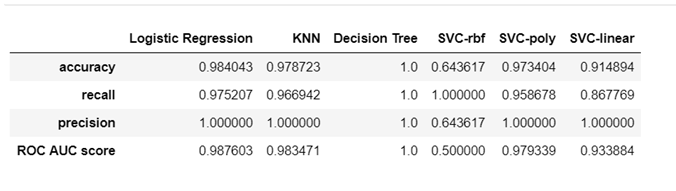

We can see a definite improvement in the performance of each model, especially the Support Vector Machine models, upon running PCA. There is an over increase in accuracy scores across all the models. 

# Deep Learning Models - Classification

## Perceptron 

In [174]:
modelpc = Sequential()
#input layer
modelpc.add(Dense(10, input_dim = 28, activation = 'relu'))
#output layer
modelpc.add(Dense(1, activation = 'sigmoid'))

#make computational graph - compile
modelpc.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#train the model - fit
modelpc.fit(X_train, y_train, epochs = 50, batch_size = 300)

Epoch 1/50
564/564 [==============================] - 0s 866us/step - loss: 0.7136 - acc: 0.4805
Epoch 2/50
564/564 [==============================] - 0s 10us/step - loss: 0.7064 - acc: 0.4628
Epoch 3/50
564/564 [==============================] - 0s 11us/step - loss: 0.6982 - acc: 0.4450
Epoch 4/50
564/564 [==============================] - 0s 10us/step - loss: 0.6904 - acc: 0.4752
Epoch 5/50
564/564 [==============================] - 0s 11us/step - loss: 0.6827 - acc: 0.5018
Epoch 6/50
564/564 [==============================] - 0s 10us/step - loss: 0.6750 - acc: 0.5142
Epoch 7/50
564/564 [==============================] - 0s 9us/step - loss: 0.6674 - acc: 0.5319
Epoch 8/50
564/564 [==============================] - 0s 11us/step - loss: 0.6600 - acc: 0.5426
Epoch 9/50
564/564 [==============================] - 0s 12us/step - loss: 0.6526 - acc: 0.5762
Epoch 10/50
564/564 [==============================] - 0s 11us/step - loss: 0.6454 - acc: 0.6011
Epoch 11/50
564/564 [==================

In [175]:
modelpc.evaluate(X_train,y_train)

564/564 [==============================] - 0s 223us/step


[0.4469689794466005, 0.7943262419802077]

In [176]:
modelpc.evaluate(X_test,y_test)

188/188 [==============================] - 0s 37us/step


[0.443254679441452, 0.8191489349020288]

## MLP

In [177]:
modelCM = Sequential()
#input layer
modelCM.add(Dense(20, input_dim = 28, activation = 'relu'))
#hidden layers
modelCM.add(Dense(10, activation = 'relu'))
modelCM.add(Dense(5, activation = 'relu'))
#output layer
modelCM.add(Dense(1, activation = 'sigmoid'))

#compile the model
 
modelCM.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#train the model
modelCM.fit(X_train, y_train, epochs = 30, batch_size = 150)

Epoch 1/30
564/564 [==============================] - 1s 1ms/step - loss: 0.7259 - acc: 0.1365
Epoch 2/30
564/564 [==============================] - 0s 20us/step - loss: 0.7085 - acc: 0.3369
Epoch 3/30
564/564 [==============================] - 0s 19us/step - loss: 0.6934 - acc: 0.4858
Epoch 4/30
564/564 [==============================] - 0s 18us/step - loss: 0.6790 - acc: 0.5461
Epoch 5/30
564/564 [==============================] - 0s 15us/step - loss: 0.6645 - acc: 0.6082
Epoch 6/30
564/564 [==============================] - 0s 16us/step - loss: 0.6503 - acc: 0.6241
Epoch 7/30
564/564 [==============================] - 0s 16us/step - loss: 0.6360 - acc: 0.6294
Epoch 8/30
564/564 [==============================] - 0s 16us/step - loss: 0.6217 - acc: 0.6312
Epoch 9/30
564/564 [==============================] - 0s 18us/step - loss: 0.6070 - acc: 0.6312
Epoch 10/30
564/564 [==============================] - 0s 22us/step - loss: 0.5922 - acc: 0.6312
Epoch 11/30
564/564 [===================

In [178]:
modelCM.evaluate(X_train,y_train)

564/564 [==============================] - 0s 269us/step


[0.3485015567312849, 0.8102836875205345]

In [179]:
modelCM.evaluate(X_test, y_test)

188/188 [==============================] - 0s 37us/step


[0.33323323346198874, 0.8191489349020288]

Closing comments:

- As per the discussions about Project-1, we have made improvements to the feature selection process and we have included a link to the updated Project-1.

link: https://utdallas.box.com/s/xdgo0x01fw2nbi2j22a1hnhh3nu4v4ar 

- On observing the final score table for the Regression tasks, we find that the best suited model that outperforms every other model is Support Vector Regressor with the "Poly" kernel. There was a significant improvement when compared to the same models run without PCA applied data. 

- For the Classification tasks, we find that Decison tree outperforms every other model. We can also see that Precison and Recall scores of all models, on applying dimensionality reduction result in better scores.  


- We looked at Coefficient of Determination  as the performance metric for the Regression tasks and used mean squared error as loss function

- For classfication, we have considered binary cross entropy as loss function and looked at Accuracy values to measure performance of the model.  